In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pathlib import Path
import gensim
import string
from nltk.corpus import stopwords, wordnet
import nltk
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from nltk.stem.wordnet import WordNetLemmatizer
import re
from gensim.models import CoherenceModel
from datetime import datetime

In [2]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [3]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [4]:
politifact_with_fake_domain = pd.read_csv(Path('/home3/usfb/analysis/analysis-fake-news/temp/post-match-domain/1000_page_politifact_domain.csv'))
topic_modeling_path = Path('/home3/ntueconfbra5/Desktop/post_message_without_http.csv')
politifact_topic_training = pd.read_csv(topic_modeling_path)
politifact_topic_training

,page_id,page_name,post_id,post_type,post_name,post_message,post_caption,post_picture,post_link,post_description,...,post_created_time_CT,post_updated_time_CT,post_created_date_CT,post_updated_date_CT,post_created_time,post_updated_time,page_talking_about_count,domain,category,type
0,440106476051475,Freedom Daily,440106476051475_1308905149171599,link,Donald Trump Thinks Some Kids NEED a GOOD Old ...,Donald Trump Thinks Some Kids NEED a GOOD Ol' ...,freedomdaily.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://freedomdaily.com/donald-trump-thinks-ki...,A good 'Ol Whoopin!,...,2016-11-22T10:28:48Z,2016-12-10T19:02:11Z,2016-11-22,2016-12-10,2016-11-22T16:28:48Z,2016-12-11T01:02:11Z,203082.0,FreedomDaily.com,Media/News/Publishing,media
1,610045389164725,Liberal Daily,610045389164725_770596729776256,link,"""Grow A Nut"", Whoopi Doesn't Hold Back, Just T...","Whoopi is pissed off, just let loose on the sp...",liberalplug.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://liberalplug.com/2017/02/07/grow-nut-who...,NaN,...,2017-02-07T14:00:03Z,2017-04-03T18:43:49Z,2017-02-07,2017-04-03,2017-02-07T20:00:03Z,2017-04-03T23:43:49Z,165919.0,LiberalPlug.com,Media/News/Publishing,media
2,440106476051475,Freedom Daily,440106476051475_1138216752907107,link,"Home Invasion Thug Stabs 75-Year-Old Man, 80-Y...","Home Invasion Thug Stabs 75-Year-Old Man, 80-Y...",freedomdaily.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://freedomdaily.com/home-invasion-thug-sta...,"An intruder broke into a home in Monroe, Washi...",...,2016-05-01T16:30:00Z,2016-05-03T13:40:50Z,2016-05-01,2016-05-03,2016-05-01T21:30:00Z,2016-05-03T18:40:50Z,273614.0,FreedomDaily.com,Media/News/Publishing,media
3,440106476051475,Freedom Daily,440106476051475_1376156649113115,link,Donald Trump Thinks Some Kids NEED a GOOD Old ...,Donald Trump Thinks Some Kids NEED a GOOD Old ...,freedomdaily.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://freedomdaily.com/donald-trump-thinks-ki...,A good 'Ol Whoopin!,...,2017-01-15T11:03:18Z,2017-01-22T11:47:35Z,2017-01-15,2017-01-22,2017-01-15T17:03:18Z,2017-01-22T17:47:35Z,200739.0,FreedomDaily.com,Media/News/Publishing,media
4,610045389164725,Liberal Daily,610045389164725_758948130941116,link,Jimmy Carter Flew To DC For Inauguration...But...,This is how a man of HONOR and DIGNITY behaves...,liberalplug.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://liberalplug.com/2017/01/21/jimmy-carter...,NaN,...,2017-01-21T17:30:00Z,2017-01-26T20:19:55Z,2017-01-21,2017-01-26,2017-01-21T23:30:00Z,2017-01-27T02:19:55Z,171811.0,LiberalPlug.com,Media/News/Publishing,media
5,440106476051475,Freedom Daily,440106476051475_1279170668811714,link,Media RAGING After City's Biggest Police Union...,Media RAGING After City's Biggest Police Union...,freedomdaily.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://freedomdaily.com/media-raging-citys-big...,HAha! Liberal media is freaking out because Sh...,...,2016-10-24T10:24:08Z,2016-10-26T03:01:07Z,2016-10-24,2016-10-26,2016-10-24T15:24:08Z,2016-10-26T08:01:07Z,437482.0,FreedomDaily.com,Media/News/Publishing,media
6,610045389164725,Liberal Daily,610045389164725_755235044645758,link,Liz Warren Just Struck At Trump With A Bill Th...,Hero Senator Liz Warren just filed a bill that...,liberalplug.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://liberalplug.com/2017/01/15/liz-warren-j...,NaN,...,2017-01-15T13:21:00Z,2017-02-18T21:07:05Z,2017-01-15,2017-02-18,2017-01-15T19:21:00Z,2017-02-19T03:07:05Z,171811.0,LiberalPlug.com,Media/News/Publishing,media
7,610045389164725,Liberal Daily,610045389164725_774673936035202,link,"Congressman Who Called Trump ""Racist"" Refuses ...",A Dem congressman caught flak for calling Trum...,liberalplug.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://liberalplug.com/2017/02/14/congressman-...,NaN,...,2017-02-14T14:00:00Z,2017-02-21T04:58:28Z,2017-02-14,2017-02-21,2017-02-14T20:00:00Z,2017-02-21T10:58:28Z,16

# POST NAME ANALYSIS

In [5]:
total_post_name = []
for i in politifact_with_fake_domain['post_name'][:]:
    total_post_name.append(str(i))

In [6]:
total_post_name = []
for i in politifact_with_fake_domain['post_name'][:]:
    total_post_name.append(str(i))
totalpost_name = []
for i in total_post_name:
    tokens = word_tokenize(i)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('','',string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    totalpost_name.append(words)

# SELECT THE BEST NUMBER OF TOPICS

In [7]:
dictionary = corpora.Dictionary(totalpost_name)
corpus = [dictionary.doc2bow(text) for text in totalpost_name]
tfidf = models.TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]
tfidf_corpus

In [8]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=tfidf_corpus, texts=totalpost_name, start=2, limit=40, step=6)

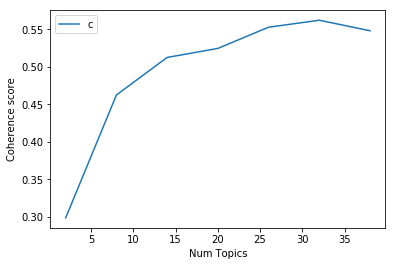

In [9]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [10]:
model2 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=15, id2word=dictionary)
model2.print_topics(num_words=8)

[(0,
  '0.044*"politics" + 0.037*"schiff" + 0.024*"illuminati" + 0.012*"market" + 0.009*"mind" + 0.008*"world" + 0.008*"list" + 0.007*"ways"'),
 (1,
  '0.024*"collapse" + 0.009*"little" + 0.009*"united" + 0.008*"hollywood" + 0.008*"political" + 0.008*"stock" + 0.008*"order" + 0.008*"prepare"'),
 (2,
  '0.022*"economic" + 0.019*"economy" + 0.013*"government" + 0.010*"barack" + 0.009*"hillary" + 0.008*"obama" + 0.008*"facts" + 0.007*"director"'),
 (3,
  '0.011*"gold" + 0.009*"run" + 0.009*"markets" + 0.008*"program" + 0.008*"military" + 0.008*"reserve" + 0.007*"soil" + 0.007*"refugee"'),
 (4,
  '0.103*"alternative" + 0.023*"dollar" + 0.012*"things" + 0.010*"guess" + 0.009*"windows" + 0.007*"pics" + 0.007*"secret" + 0.007*"rare"'),
 (5,
  '0.026*"doug" + 0.023*"giles" + 0.012*"clashdaily" + 0.010*"even" + 0.009*"ever" + 0.008*"build" + 0.007*"darpa" + 0.007*"obama"'),
 (6,
  '0.037*"videos" + 0.013*"conspiracy" + 0.011*"black" + 0.010*"matter" + 0.009*"lives" + 0.008*"armed" + 0.007*"biza

In [11]:
politifact_topicmodel = pd.DataFrame()
politifact_topicmodel = politifact_with_fake_domain[:]
politifact_topicmodel['post_created_date_CT'] = politifact_topicmodel['post_created_date_CT'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
politifact_topicmodel['post_created_month'] = politifact_with_fake_domain['post_created_date_CT'].map(lambda x:x[0:7])

## Topic Modelling For Every Month

In [12]:
total_post_name_201601 = []
for i in politifact_topicmodel[politifact_topicmodel['post_created_month'] == '2016-01']['post_name']:
    total_post_name_201601.append(str(i))
totalpost_name = []
for i in total_post_name_201601:
    tokens = word_tokenize(i)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('','',string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    totalpost_name.append(words)
dictionary = corpora.Dictionary(totalpost_name)
corpus = [dictionary.doc2bow(text) for text in totalpost_name]
tfidf = models.TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]
tfidf_corpus
model2 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=15, id2word=dictionary)
model2.print_topics(num_words=8)

[(0,
  '0.020*"national" + 0.018*"politics" + 0.012*"economy" + 0.010*"keep" + 0.010*"review" + 0.009*"dead" + 0.009*"want" + 0.008*"oregon"'),
 (1,
  '0.043*"alternative" + 0.014*"ancient" + 0.013*"city" + 0.011*"weapon" + 0.011*"ark" + 0.011*"gabriel" + 0.011*"antartica" + 0.010*"mysterious"'),
 (2,
  '0.018*"trump" + 0.016*"cruz" + 0.013*"donald" + 0.012*"russia" + 0.010*"restore" + 0.010*"ted" + 0.009*"beck" + 0.008*"judge"'),
 (3,
  '0.015*"politics" + 0.013*"admits" + 0.011*"christmas" + 0.011*"vote" + 0.010*"evil" + 0.010*"windows" + 0.009*"economic" + 0.008*"trump"'),
 (4,
  '0.016*"tv" + 0.012*"confession" + 0.010*"market" + 0.010*"reasons" + 0.008*"stocks" + 0.007*"military" + 0.007*"feds" + 0.006*"politics"'),
 (5,
  '0.016*"past" + 0.009*"human" + 0.009*"barracuda" + 0.009*"brigade" + 0.009*"american" + 0.009*"rare" + 0.008*"year" + 0.008*"ban"'),
 (6,
  '0.057*"integrated" + 0.057*"disappear" + 0.056*"germans" + 0.054*"disgusting" + 0.053*"migrants" + 0.050*"say" + 0.030*"

In [13]:
total_post_name_201602 = []
for i in politifact_topicmodel[politifact_topicmodel['post_created_month'] == '2016-02']['post_name']:
    total_post_name_201602.append(str(i))
totalpost_name = []
for i in total_post_name_201602:
    tokens = word_tokenize(i)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('','',string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    totalpost_name.append(words)
dictionary = corpora.Dictionary(totalpost_name)
corpus = [dictionary.doc2bow(text) for text in totalpost_name]
tfidf = models.TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]
tfidf_corpus
model2 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=15, id2word=dictionary)
model2.print_topics(num_words=8)

[(0,
  '0.038*"domestic" + 0.027*"energy" + 0.027*"weapons" + 0.026*"prepare" + 0.021*"chemtrails" + 0.021*"relation" + 0.013*"emergency" + 0.012*"senate"'),
 (1,
  '0.039*"great" + 0.027*"turn" + 0.022*"alternative" + 0.012*"stores" + 0.011*"nation" + 0.011*"facebook" + 0.010*"recession" + 0.009*"must"'),
 (2,
  '0.016*"revealed" + 0.011*"illuminati" + 0.011*"using" + 0.010*"sweetheart" + 0.010*"tan" + 0.010*"messed" + 0.010*"program" + 0.010*"sue"'),
 (3,
  '0.020*"darpa" + 0.019*"pledge" + 0.019*"obedience" + 0.019*"allegiance" + 0.018*"indoctrination" + 0.016*"deploying" + 0.016*"autonomous" + 0.016*"drones"'),
 (4,
  '0.038*"politics" + 0.029*"department" + 0.022*"war" + 0.020*"extremists" + 0.015*"prepares" + 0.015*"popping" + 0.015*"every" + 0.011*"nominations"'),
 (5,
  '0.033*"fed" + 0.023*"map" + 0.016*"movie" + 0.016*"scotus" + 0.013*"reasons" + 0.009*"terrorists" + 0.009*"alert" + 0.008*"carolina"'),
 (6,
  '0.063*"peter" + 0.063*"schiff" + 0.025*"politics" + 0.013*"proof" 

In [14]:
total_post_name_201603 = []
for i in politifact_topicmodel[politifact_topicmodel['post_created_month'] == '2016-03']['post_name']:
    total_post_name_201603.append(str(i))
totalpost_name = []
for i in total_post_name_201603:
    tokens = word_tokenize(i)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('','',string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    totalpost_name.append(words)
dictionary = corpora.Dictionary(totalpost_name)
corpus = [dictionary.doc2bow(text) for text in totalpost_name]
tfidf = models.TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]
tfidf_corpus
model2 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=15, id2word=dictionary)
model2.print_topics(num_words=8)

[(0,
  '0.033*"jim" + 0.019*"willie" + 0.010*"us" + 0.009*"take" + 0.009*"politics" + 0.009*"bernie" + 0.009*"email" + 0.008*"lost"'),
 (1,
  '0.016*"politics" + 0.013*"top" + 0.010*"video" + 0.009*"plans" + 0.009*"obama" + 0.009*"revelation" + 0.008*"want" + 0.008*"targeting"'),
 (2,
  '0.012*"scandalous" + 0.011*"attacks" + 0.010*"things" + 0.010*"politics" + 0.010*"preparing" + 0.009*"never" + 0.009*"unbelievably" + 0.009*"daylight"'),
 (3,
  '0.015*"dollar" + 0.010*"china" + 0.010*"politics" + 0.009*"video" + 0.009*"everywhere" + 0.009*"starting" + 0.008*"interview" + 0.008*"bank"'),
 (4,
  '0.015*"elections" + 0.012*"update" + 0.012*"politics" + 0.012*"kill" + 0.009*"amendment" + 0.009*"releases" + 0.009*"satanism" + 0.008*"guns"'),
 (5,
  '0.014*"politics" + 0.011*"government" + 0.010*"civil" + 0.008*"video" + 0.008*"oregon" + 0.007*"live" + 0.007*"war" + 0.007*"conservative"'),
 (6,
  '0.024*"videos" + 0.018*"illuminati" + 0.011*"false" + 0.009*"understanding" + 0.006*"finds" + 

In [15]:
total_post_name_201604 = []
for i in politifact_topicmodel[politifact_topicmodel['post_created_month'] == '2016-04']['post_name']:
    total_post_name_201604.append(str(i))
totalpost_name = []
for i in total_post_name_201604:
    tokens = word_tokenize(i)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('','',string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    totalpost_name.append(words)
dictionary = corpora.Dictionary(totalpost_name)
corpus = [dictionary.doc2bow(text) for text in totalpost_name]
tfidf = models.TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]
tfidf_corpus
model2 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=15, id2word=dictionary)
model2.print_topics(num_words=8)

[(0,
  '0.049*"videos" + 0.025*"global" + 0.021*"politics" + 0.016*"even" + 0.012*"mean" + 0.011*"presidential" + 0.010*"video" + 0.010*"city"'),
 (1,
  '0.011*"politics" + 0.010*"john" + 0.010*"slaves" + 0.010*"guess" + 0.010*"begun" + 0.009*"reality" + 0.008*"wants" + 0.007*"nobody"'),
 (2,
  '0.015*"wealth" + 0.011*"deadly" + 0.010*"students" + 0.009*"clinton" + 0.008*"using" + 0.007*"hillary" + 0.007*"disease" + 0.007*"ever"'),
 (3,
  '0.022*"society" + 0.018*"election" + 0.015*"silent" + 0.010*"politics" + 0.009*"screaming" + 0.008*"families" + 0.007*"google" + 0.007*"read"'),
 (4,
  '0.018*"martial" + 0.012*"law" + 0.009*"already" + 0.009*"hate" + 0.008*"happens" + 0.007*"may" + 0.007*"likely" + 0.006*"refugee"'),
 (5,
  '0.017*"largest" + 0.017*"history" + 0.015*"evaporation" + 0.011*"politics" + 0.009*"party" + 0.009*"video" + 0.009*"became" + 0.007*"typical"'),
 (6,
  '0.013*"politics" + 0.011*"mankind" + 0.011*"every" + 0.011*"discovered" + 0.010*"news" + 0.008*"bad" + 0.008*

# POST MESSAGE ANALYSIS

In [16]:
total_post_message = []
lemmatizer = WordNetLemmatizer()
for i in politifact_topic_training['post_message']:
    tokens = word_tokenize(str(i))
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('','',string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    words = nltk.pos_tag(words)
    l = []
    for word, tag in words:
        wntag = get_wordnet_pos(tag)
        if wntag is None:
            lemma = lemmatizer.lemmatize(word)
            l.append(lemma)
        else:
            lemma = lemmatizer.lemmatize(word, pos=wntag) 
            l.append(lemma)        
    total_post_message.append(l)

In [17]:

dictionary = corpora.Dictionary(total_post_message)
corpus = [dictionary.doc2bow(text) for text in total_post_message]


In [18]:
tfidf = models.TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]
model2 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=5, id2word=dictionary, minimum_probability=0)
model2.print_topics(num_words=5)

[(0,
  '0.006*"nuclear" + 0.006*"video" + 0.006*"human" + 0.005*"secret" + 0.005*"history"'),
 (1,
  '0.011*"willie" + 0.010*"jim" + 0.010*"peter" + 0.009*"schiff" + 0.008*"video"'),
 (2,
  '0.005*"go" + 0.005*"collapse" + 0.004*"find" + 0.004*"come" + 0.004*"something"'),
 (3,
  '0.012*"illuminati" + 0.009*"economic" + 0.008*"top" + 0.008*"market" + 0.007*"obama"'),
 (4,
  '0.007*"economy" + 0.005*"time" + 0.005*"bank" + 0.005*"martial" + 0.005*"choice"')]

In [19]:
total_post_message_original = []
for i in politifact_topic_training['post_message']:
    total_post_message_original.append(i)

In [20]:
lda_corpus = model2[corpus]

In [21]:
cluster1 = [j for i,j in zip(lda_corpus,total_post_message_original) if i[0][1] > 0.8]
cluster2 = [j for i,j in zip(lda_corpus,total_post_message_original) if i[1][1] > 0.8]
cluster3 = [j for i,j in zip(lda_corpus,total_post_message_original) if i[2][1] > 0.8]
cluster4 = [j for i,j in zip(lda_corpus,total_post_message_original) if i[3][1] > 0.8]
cluster5 = [j for i,j in zip(lda_corpus,total_post_message_original) if i[4][1] > 0.8]

In [22]:
print(cluster5[156])

Multiple Choice Quiz time, kiddies!
Which answer did you choose? A or B? 


In [23]:
model6 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=6, id2word=dictionary)
model6.print_topics(num_words=5)

[(0,
  '0.011*"willie" + 0.011*"jim" + 0.009*"obama" + 0.008*"government" + 0.008*"video"'),
 (1,
  '0.018*"peter" + 0.018*"schiff" + 0.004*"video" + 0.004*"american" + 0.004*"obama"'),
 (2,
  '0.012*"global" + 0.010*"economic" + 0.009*"nuclear" + 0.008*"dollar" + 0.007*"market"'),
 (3, '0.005*"one" + 0.005*"would" + 0.005*"go" + 0.004*"make" + 0.004*"bad"'),
 (4,
  '0.009*"false" + 0.008*"human" + 0.007*"ancient" + 0.006*"time" + 0.006*"choice"'),
 (5,
  '0.011*"economy" + 0.007*"martial" + 0.006*"video" + 0.006*"enjoy" + 0.006*"share"')]

In [24]:
lda_corpus = model6[corpus]
cluster = [[],[],[],[],[],[]]
for i,j in zip(lda_corpus, total_post_message_original):
    for k in range(len(i)):
        if i[k][1] > 0.8:
            cluster[k].append(j)

In [25]:
cluster[4][844]

'Multiple Choice Quiz time, kiddies!\nWhich answer did you chose?\n'

In [26]:
model7 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=7, id2word=dictionary)
model7.print_topics(num_words=5)

[(0,
  '0.028*"peter" + 0.027*"schiff" + 0.013*"economy" + 0.011*"false" + 0.008*"market"'),
 (1,
  '0.010*"choice" + 0.010*"currency" + 0.009*"paris" + 0.009*"pyramid" + 0.009*"multiple"'),
 (2,
  '0.019*"jim" + 0.011*"illuminati" + 0.010*"collapse" + 0.009*"video" + 0.008*"government"'),
 (3,
  '0.007*"video" + 0.007*"obama" + 0.005*"economic" + 0.005*"war" + 0.005*"nuclear"'),
 (4,
  '0.016*"willie" + 0.008*"global" + 0.006*"dollar" + 0.005*"go" + 0.004*"would"'),
 (5,
  '0.009*"please" + 0.009*"enjoy" + 0.007*"share" + 0.007*"martial" + 0.007*"fwd"'),
 (6,
  '0.009*"history" + 0.007*"ancient" + 0.006*"human" + 0.005*"earth" + 0.005*"mass"')]

In [27]:
lda_corpus = model7[corpus]
cluster7 = [[],[],[],[],[],[],[]]
for i,j in zip(lda_corpus, total_post_message_original):
    for k in range(len(i)):
        if i[k][1] > 0.8:
            cluster7[k].append(j)

In [28]:
cluster7[2][7]

"Lets hope this Speaker of the House has a lot more guts than the last one.\nCan we get 5,000 'LIKES' to stop Syrian Refugees from entering the U.S.?"

In [29]:
model8 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=8, id2word=dictionary)
model8.print_topics(num_words=5)

[(0, '0.005*"go" + 0.004*"one" + 0.004*"luck" + 0.004*"top" + 0.004*"thing"'),
 (1,
  '0.015*"please" + 0.014*"enjoy" + 0.012*"share" + 0.009*"fwd" + 0.009*"love"'),
 (2,
  '0.006*"school" + 0.006*"finance" + 0.005*"bank" + 0.005*"cover" + 0.005*"court"'),
 (3,
  '0.012*"market" + 0.009*"interest" + 0.008*"pyramid" + 0.007*"build" + 0.007*"find"'),
 (4,
  '0.008*"economic" + 0.008*"nuclear" + 0.005*"video" + 0.005*"flag" + 0.005*"confession"'),
 (5,
  '0.016*"willie" + 0.015*"jim" + 0.014*"peter" + 0.007*"video" + 0.007*"obama"'),
 (6,
  '0.027*"schiff" + 0.018*"illuminati" + 0.016*"global" + 0.015*"dollar" + 0.010*"history"'),
 (7,
  '0.011*"false" + 0.010*"collapse" + 0.008*"choice" + 0.007*"crazy" + 0.007*"multiple"')]

In [30]:
lda_corpus = model8[corpus]
cluster8 = [[],[],[],[],[],[],[],[]]
for i,j in zip(lda_corpus, total_post_message_original):
    for k in range(len(i)):
        if i[k][1] > 0.8:
            cluster8[k].append(j)

In [31]:
model15 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=15, id2word=dictionary)
model15.print_topics(num_words=5)

[(0,
  '0.019*"economy" + 0.007*"documentary" + 0.006*"home" + 0.005*"come" + 0.005*"door"'),
 (1,
  '0.007*"conspiracy" + 0.007*"mass" + 0.006*"luck" + 0.005*"black" + 0.005*"video"'),
 (2,
  '0.017*"ancient" + 0.016*"confession" + 0.014*"paris" + 0.010*"please" + 0.010*"read"'),
 (3,
  '0.009*"thought" + 0.009*"hillary" + 0.008*"lie" + 0.008*"blow" + 0.008*"good"'),
 (4,
  '0.047*"willie" + 0.036*"peter" + 0.026*"illuminati" + 0.014*"russia" + 0.013*"top"'),
 (5,
  '0.010*"currency" + 0.010*"pyramid" + 0.008*"student" + 0.007*"school" + 0.007*"secret"'),
 (6,
  '0.018*"fwd" + 0.013*"german" + 0.012*"guess" + 0.009*"update" + 0.008*"creepy"'),
 (7,
  '0.027*"jim" + 0.013*"dollar" + 0.012*"economic" + 0.010*"false" + 0.007*"u"'),
 (8,
  '0.026*"nuclear" + 0.012*"antarctica" + 0.012*"theory" + 0.010*"powerful" + 0.010*"government"'),
 (9,
  '0.024*"global" + 0.011*"unreal" + 0.010*"due" + 0.009*"stuff" + 0.009*"crazy"'),
 (10,
  '0.020*"choice" + 0.018*"multiple" + 0.018*"quiz" + 0.016*

In [32]:
lda_corpus = model15[corpus]
cluster15 = []
for i in range(15):
    cluster15.append([])
for i,j in zip(lda_corpus, total_post_message_original):
    for k in range(len(i)):
        if i[k][1] > 0.8:
            cluster15[k].append(j)

In [33]:
group = 0
for i in cluster15:
    print("Cluster" + str(group))
    for j in range(3):
        print(i[j])
    group = group + 1

Cluster0
Sanders just declared WAR on Trump!
Can we get 100,000 LIKES for Bernie for sticking up for America?
Woman Sets Her Husband On FIRE For Sexually ABUSING Her 7 Year Old Daughter
WHEW! Thank God! America ... we dodged a BULLET. Check out this crap.
Cluster1
This is how a man of HONOR and DIGNITY behaves!
Trump could learn a lot from this.
Can we get 15,000 Likes for Jimmy Carter?
FINALLY!! They had enough of Muslim Refugees and the people voted to ban the burqa!!! 

Lets get 5000 SHARES if you agree with this!!
They want to save healthcare for the American people!
But they need YOUR voices!
Can we get 15,000 Likes if you think health care should be a HUMAN RIGHT in our country?!
Cluster2
STAND YOUR GROUND! Muslim are IRATE that Small Town Colorado Christians Won’t Sell Them Property to Build a Mosque!

Show your support for these Americans who said HELL NO! NOT IN MY BACKYARD!!
STAND YOUR GROUND! Muslim are IRATE that Small Town Colorado Christians Won’t Sell Them Property to Bu

## 0.01 sampling

In [34]:
total_post_message = []
politifact_topic_training = politifact_with_fake_domain[politifact_with_fake_domain.post_message.notna()]
sampling = politifact_topic_training.sample(frac=0.01)
sampling

,page_id,page_name,post_id,post_type,post_name,post_message,post_caption,post_picture,post_link,post_description,...,post_comments,post_shares,post_created_time_CT,post_updated_time_CT,post_created_date_CT,post_updated_date_CT,post_created_time,post_updated_time,page_talking_about_count,domain
47855,149817218374125,Girls Just Wanna Have Guns,149817218374125_1090656434290194,link,QUESTION: Do You AGREE With Trump That Rosie O...,WOW...Rosie just outdid her nasty self.\nDo yo...,clashdaily.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://clashdaily.com/2016/05/question-agree-t...,You're not going to believe her latest obsceni...,...,83,42.0,2016-05-30T17:20:00Z,2016-05-31T10:32:34Z,2016-05-30,2016-05-31,2016-05-30T22:20:00Z,2016-05-31T15:32:34Z,36066.0,ClashDaily.com
89814,702815073143116,Rebirth of Freedom,702815073143116_948065718618049,link,Ghetto Trash Fight Goes Too Far When Woman Scr...,A disturbing video is going viral after a grou...,madworldnews.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://madworldnews.com/ghetto-trash-fight-scr...,A disturbing video is going viral after a grou...,...,81,31.0,2016-01-03T13:45:00Z,2016-01-05T07:26:20Z,2016-01-03,2016-01-05,2016-01-03T19:45:00Z,2016-01-05T13:26:20Z,24573.0,MadWorldNews.com
18182,513813158657249,Mad World News,513813158657249_1111239825581243,link,"Muslim Brats Sue Cafe For 'Racist' Treatment, ...",A group of entitled Muslim women entered a Cal...,madworldnews.com,https://fbexternal-a.akamaihd.net/safe_image.p...,http://madworldnews.com/muslim-brats-sue-cafe-...,A group of entitled Muslim women entered a Cal...,...,178,714.0,2016-06-23T16:30:23Z,2016-06-25T00:44:35Z,2016-06-23,2016-06-25,2016-06-23T21:30:23Z,2016-06-25T05:44:35Z,1863401.0,MadWorldNews.com
9772,158924294183807,Allen West Republic,158924294183807_1093294724080088,link,Do You AGREE With Trump That Rosie O’Donnell’s...,You’re not going to believe her latest....,clashdaily.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://clashdaily.com/2016/05/question-agree-t...,You're not going to believe her latest ....,...,661,171.0,2016-06-12T12:45:01Z,2016-06-14T14:22:32Z,2016-06-12,2016-06-14,2016-06-12T17:45:01Z,2016-06-14T19:22:32Z,316278.0,ClashDaily.com
81852,513813158657249,Mad World News,513813158657249_1086345848070641,link,Photo Of West Point Grad Leaves Onlookers Over...,The U.S. Military Academy recently held its gr...,madworldnews.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://madworldnews.com/photo-west-point-grad/,The U.S. Military Academy recently held its gr...,...,2,25.0,2016-05-26T19:30:21Z,2016-05-26T21:38:22Z,2016-05-26,2016-05-26,2016-05-27T00:30:21Z,2016-05-27T02:38:22Z,1641166.0,MadWorldNews.com
108830,702815073143116,Rebirth of Freedom,702815073143116_909180665839888,link,"[Watch] Woman Has BAD Breath, Looks Behind Ton...",Quite the unsettling video was recently releas...,madworldnews.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://madworldnews.com/woman-bad-breath-cause/,Quite the unsettling video was recently releas...,...,1,15.0,2015-10-10T18:45:00Z,2015-10-11T20:09:05Z,2015-10-10,2015-10-11,2015-10-10T23:45:00Z,2015-10-12T01:09:05Z,39490.0,MadWorldNews.com
45906,721683147909323,The New Resistance,721683147909323_1200776859999947,link,Migrants Try To Force Coast Guard To Rescue Th...,If we’ve seen anything over the past few years...,madworldnews.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://madworldnews.com/migrants-force-coast-g...,If we’ve seen anything over the past few years...,...,116,100.0,2016-11-22T16:30:12Z,2016-11-24T14:29:46Z,2016-11-22,2016-11-24,2016-11-22T22:30:12Z,2016-11-24T20:29:46Z,212803.0,MadWorldNews.com
121974,312531385450925,The Last Great Stand,312531385450925_939365296100861,link,Obama Openly Promotes the Murder of Babies' an...,Obama Openly Promotes the Murder of Babies’ & ...,beforeitsnews.com,https://external.xx.fbcdn.net/safe_image.php?d...,http://beforeitsnews.com/politics/2015/09/obam

In [35]:
for i in sampling['post_message']:
    tokens = word_tokenize(i)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('','',string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    total_post_message.append(words)

In [36]:

dictionary = corpora.Dictionary(total_post_message)
corpus = [dictionary.doc2bow(text) for text in total_post_message]


### into different number of topic

In [37]:
tfidf = models.TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

model2 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=5, id2word=dictionary)
model2.print_topics(num_words=5)

[(0,
  '0.003*"http" + 0.002*"hillary" + 0.002*"video" + 0.002*"one" + 0.002*"trump"'),
 (1,
  '0.005*"http" + 0.002*"trump" + 0.002*"obama" + 0.002*"like" + 0.002*"people"'),
 (2,
  '0.003*"http" + 0.002*"obama" + 0.002*"one" + 0.002*"trump" + 0.002*"police"'),
 (3,
  '0.003*"http" + 0.002*"obama" + 0.001*"enjoy" + 0.001*"would" + 0.001*"hillary"'),
 (4,
  '0.004*"http" + 0.002*"new" + 0.002*"obama" + 0.002*"could" + 0.002*"one"')]

In [38]:
model6 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=6, id2word=dictionary)
model6.print_topics(num_words=5)

[(0,
  '0.005*"http" + 0.002*"video" + 0.002*"would" + 0.002*"liberals" + 0.002*"hillary"'),
 (1,
  '0.002*"http" + 0.002*"trump" + 0.002*"one" + 0.002*"shares" + 0.002*"obama"'),
 (2,
  '0.003*"http" + 0.002*"however" + 0.002*"woman" + 0.002*"would" + 0.002*"reason"'),
 (3,
  '0.004*"http" + 0.002*"obama" + 0.002*"trump" + 0.002*"hillary" + 0.002*"video"'),
 (4,
  '0.003*"http" + 0.002*"obama" + 0.002*"woman" + 0.002*"right" + 0.002*"trump"'),
 (5,
  '0.003*"http" + 0.002*"multiple" + 0.002*"quiz" + 0.002*"choice" + 0.002*"kiddies"')]

In [39]:
model7 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=7, id2word=dictionary)
model7.print_topics(num_words=5)

[(0,
  '0.003*"http" + 0.002*"man" + 0.002*"obama" + 0.002*"police" + 0.002*"woman"'),
 (1,
  '0.003*"http" + 0.003*"one" + 0.002*"enjoy" + 0.002*"reason" + 0.001*"trump"'),
 (2,
  '0.003*"video" + 0.002*"http" + 0.002*"trump" + 0.002*"new" + 0.002*"one"'),
 (3,
  '0.003*"http" + 0.002*"hillary" + 0.002*"could" + 0.002*"obama" + 0.002*"go"'),
 (4,
  '0.003*"http" + 0.002*"would" + 0.002*"obama" + 0.002*"like" + 0.002*"want"'),
 (5,
  '0.003*"http" + 0.002*"enjoy" + 0.002*"obama" + 0.002*"trump" + 0.002*"one"'),
 (6,
  '0.007*"http" + 0.002*"obama" + 0.002*"choice" + 0.002*"multiple" + 0.002*"quiz"')]

In [40]:
model8 =models.ldamodel.LdaModel(tfidf_corpus, num_topics=8, id2word=dictionary)
model8.print_topics(num_words=5)

[(0,
  '0.003*"http" + 0.002*"one" + 0.002*"say" + 0.002*"hillary" + 0.002*"obama"'),
 (1,
  '0.003*"http" + 0.002*"check" + 0.002*"obama" + 0.002*"get" + 0.002*"black"'),
 (2,
  '0.004*"http" + 0.002*"trump" + 0.002*"one" + 0.002*"next" + 0.002*"video"'),
 (3,
  '0.002*"http" + 0.002*"would" + 0.002*"muslim" + 0.002*"like" + 0.001*"time"'),
 (4,
  '0.006*"http" + 0.002*"man" + 0.002*"religion" + 0.002*"obama" + 0.002*"police"'),
 (5,
  '0.002*"http" + 0.002*"video" + 0.002*"obama" + 0.002*"one" + 0.002*"going"'),
 (6,
  '0.004*"http" + 0.002*"texas" + 0.002*"would" + 0.002*"left" + 0.002*"trump"'),
 (7,
  '0.003*"http" + 0.003*"obama" + 0.002*"hillary" + 0.002*"time" + 0.002*"trump"')]